In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_set = pd.read_csv('C:/Users/yueeeeeee87/Desktop/申請資料/相關課堂作業/機器學習/CreditCard(Card)/CreditCard(Card)-1.CSV')
                       
data_set['card'] = data_set['card'].replace({'yes':'0', 'no':'1'})
data_set['owner'] = data_set['owner'].replace({'yes':'0', 'no':'1'})
data_set['selfemp'] = data_set['selfemp'].replace({'yes':'0', 'no':'1'})
print(data_set.isna())


       card  reports    age  income  share  expenditure  owner  selfemp  \
0     False    False  False   False  False        False  False    False   
1     False    False  False   False  False        False  False    False   
2     False    False  False   False  False        False  False    False   
3     False    False  False   False  False        False  False    False   
4     False    False  False   False  False        False  False    False   
...     ...      ...    ...     ...    ...          ...    ...      ...   
1314  False    False  False   False  False        False  False    False   
1315  False    False  False   False  False        False  False    False   
1316  False    False  False   False  False        False  False    False   
1317  False    False  False   False  False        False  False    False   
1318  False    False  False   False  False        False  False    False   

      dependents  months  majorcards  active  
0          False   False       False   False  
1    

In [7]:
x = data_set.drop('card', axis = 1)
y = data_set['card']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [9]:
sampler = RandomOverSampler(random_state=8)
x_train, y_train = sampler.fit_resample(x_train, y_train)

In [10]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [19]:
#ANN
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=16, input_shape=(x_train.shape[0], x_train.shape[1]), activation='sigmoid'))
model.add(keras.layers.Dense(units=16, kernel_initializer = 'uniform', activation='sigmoid'))
model.add(keras.layers.Dense(units=8, kernel_initializer = 'uniform', activation='sigmoid'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))
optimizer = SGD(lr = 0.01, momentum=0.9)
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1446, 16)          192       
_________________________________________________________________
dense_5 (Dense)              (None, 1446, 16)          272       
_________________________________________________________________
dense_6 (Dense)              (None, 1446, 8)           136       
_________________________________________________________________
dense_7 (Dense)              (None, 1446, 1)           9         
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [13]:
x_train=np.asarray(x_train).astype(np.float64)
y_train=np.asarray(y_train).astype(np.float64)
get_best_model = keras.callbacks.ModelCheckpoint('nn.mdl', moitor='accuracy')
history = model.fit(x_train, y_train, batch_size = 256, epochs = 100,
                    validation_split = 0.1, verbose = 2, callbacks=[get_best_model])

Epoch 1/100
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nn.mdl\assets
6/6 - 1s - loss: 0.2571 - accuracy: 0.4443 - val_loss: 0.2157 - val_accuracy: 1.0000
Epoch 2/100
INFO:tensorflow:Assets written to: nn.mdl\assets
6/6 - 1s - loss: 0.2544 - accuracy: 0.4443 - val_loss: 0.2287 - val_accuracy: 1.0000
Epoch 3/100
INFO:tensorflow:Assets written to: nn.mdl\assets
6/6 - 1s - loss: 0.2520 - accuracy: 0.4443 - val_loss: 0.2428 - val_accuracy: 1.0000
Epoch 4/100
INFO:tensorflow:Assets written to: nn.mdl\assets
6/6 - 1s - loss: 0.2498 - accuracy: 0.5565 - val_loss: 0.2563 - val_accuracy: 0.0000e+00
Epoch 5/100
INFO:tensorflow:Assets written to: nn.mdl\assets
6/6 - 1s - loss: 0.2483 - accuracy: 0.5557 - val_loss: 0.2689 - val_accuracy: 0.0000e+00
Epoch 6/100
INFO:tensorflow:

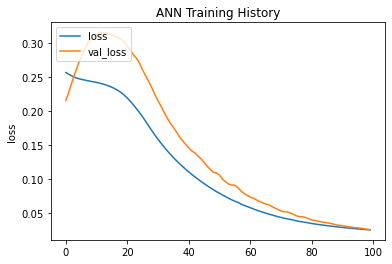

ANN Model Accuracy: 0.9869331121444702


In [18]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('ANN Training History')
    plt.ylabel(train)
    plt.xlabel;('Epoch')
    plt.legend(['loss','val_loss'], loc='upper left')
    plt.show()
show_train_history(history,'loss','val_loss')

a = history.history['accuracy'][99]
print('ANN Model Accuracy:', a)